In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 



In [9]:
digits = load_digits()

In [15]:
print(dir(digits))
print(digits.data)
print(digits.target)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [ ]:
n = input("Enter Number of digits u want to display:")
plt.gray()
for i in range(0 , int(n)):
    plt.matshow(digits.images[i])

In [17]:
df = pd.DataFrame(digits.data)
df['target'] = digits.target

df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [38]:
x = df.drop(['target'], axis='columns')
y=df.target 

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [45]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier()
model_tuned = RandomForestClassifier(n_estimators=50)
model.fit(train_x, train_y)
model_tuned.fit(train_x, train_y)

predicted_y = model.predict(test_x)
#print(predicted_y)

In [40]:
print("Normal Model Score: ", model.score(test_x,test_y))
print("Tuned Model Score: ", model_tuned.score(test_x,test_y))

Normal Model Score:  0.975
Tuned Model Score:  0.9722222222222222


Difussion matrix is used to plot truth on one axis and prediction on other matrix 

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  0  0  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 36  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0]
 [ 0  2  0  0  0  0  0  0 33  1]
 [ 0  0  0  2  0  0  0  0  2 31]]


Text(58.222222222222214, 0.5, 'Truth/Known Values')

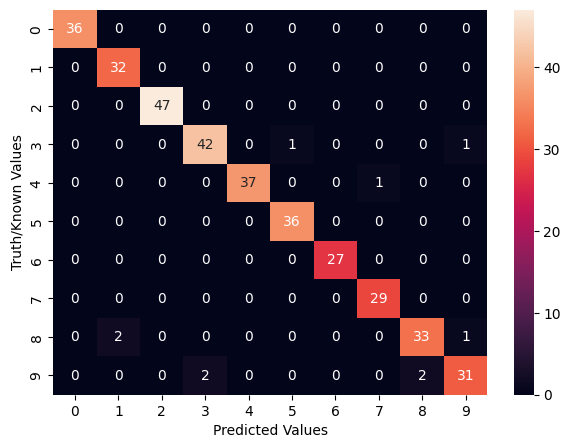

In [51]:
from sklearn.metrics import confusion_matrix 
import seaborn as sb

cm = confusion_matrix(test_y, predicted_y)
print(cm)

#Visualizing the confusion matrix using seaborn heatmap

plt.figure(figsize=(7,5))
sb.heatmap(cm, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Truth/Known Values")

2 Times the model was supposed to predict 8 but instead it predicted 1 and 33 times it predicted 8 <br>
2 Times the model was supposed to predict 9 but instead it predicted 3 and 33 times it predicted 9 <br>
2 Times the model was supposed to predict 9 but instead it predicted 8 and 33 times it predicted 9 <br>